In [114]:
import pandas as pd
import numpy as np
data40=pd.read_csv('20220519_1652978033837_40.csv')
data80=pd.read_csv('20220519_1652979760943_80.csv')
data160=pd.read_csv('20220519_1652981040289_160.csv')
data246=pd.read_csv('20220519_1652983691879_246.csv')

In [115]:
def mnk(x,y,free=1):
    k,a=np.polyfit(x, y, free)
    mu = np.mean(y) # средее
    mv = np.mean(x)
    mu2 = np.mean(y**2)
    mv2 = np.mean(x**2) # средний квадрат
    muv = np.mean (x*y) 
    sigma_k = np.sqrt(1/(x.shape[0]-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    print("Погрешность углового коэфицента")
    print(sigma_k)
    sigma_b = sigma_k * np.sqrt(mv2-mv**2)
    print("Погрешность свободного коэфицента")
    print(sigma_b)
    return (k,a)

In [116]:
data40

,t (s),V (mV)
0,0.000,12.3326
1,0.974,12.3074
2,1.952,12.2860
3,2.952,12.2633
4,3.952,12.2394
...,...,...
252,251.952,7.6460
253,252.952,7.6316
254,253.952,7.6175
255,254.952,7.6040


In [117]:
data40["ln(V/V0)"]=np.log(data40["V (mV)"]/12.3326)
data80["ln(V/V0)"]=np.log(data80["V (mV)"]/13.3383)
data160["ln(V/V0)"]=np.log(data160["V (mV)"]/14.9244)
data246["ln(V/V0)"]=np.log(data246["V (mV)"]/13.6609)

In [118]:
data40.size

771

In [119]:
k40,a40=mnk(data40["t (s)"], data40["ln(V/V0)"])
k80,a80=mnk(data80["t (s)"], data80["ln(V/V0)"])
k160,a160=mnk(data160["t (s)"], data160["ln(V/V0)"])
k246,a246=mnk(data246["t (s)"], data246["ln(V/V0)"])

Погрешность углового коэфицента
8.0469204109495e-07
Погрешность свободного коэфицента
5.969897823419648e-05
Погрешность углового коэфицента
1.1291441789177317e-06
Погрешность свободного коэфицента
0.0001717772383880416
Погрешность углового коэфицента
8.230582672658818e-07
Погрешность свободного коэфицента
0.00015684991278348722
Погрешность углового коэфицента
7.160239829559981e-07
Погрешность свободного коэфицента
0.00020053191599598874


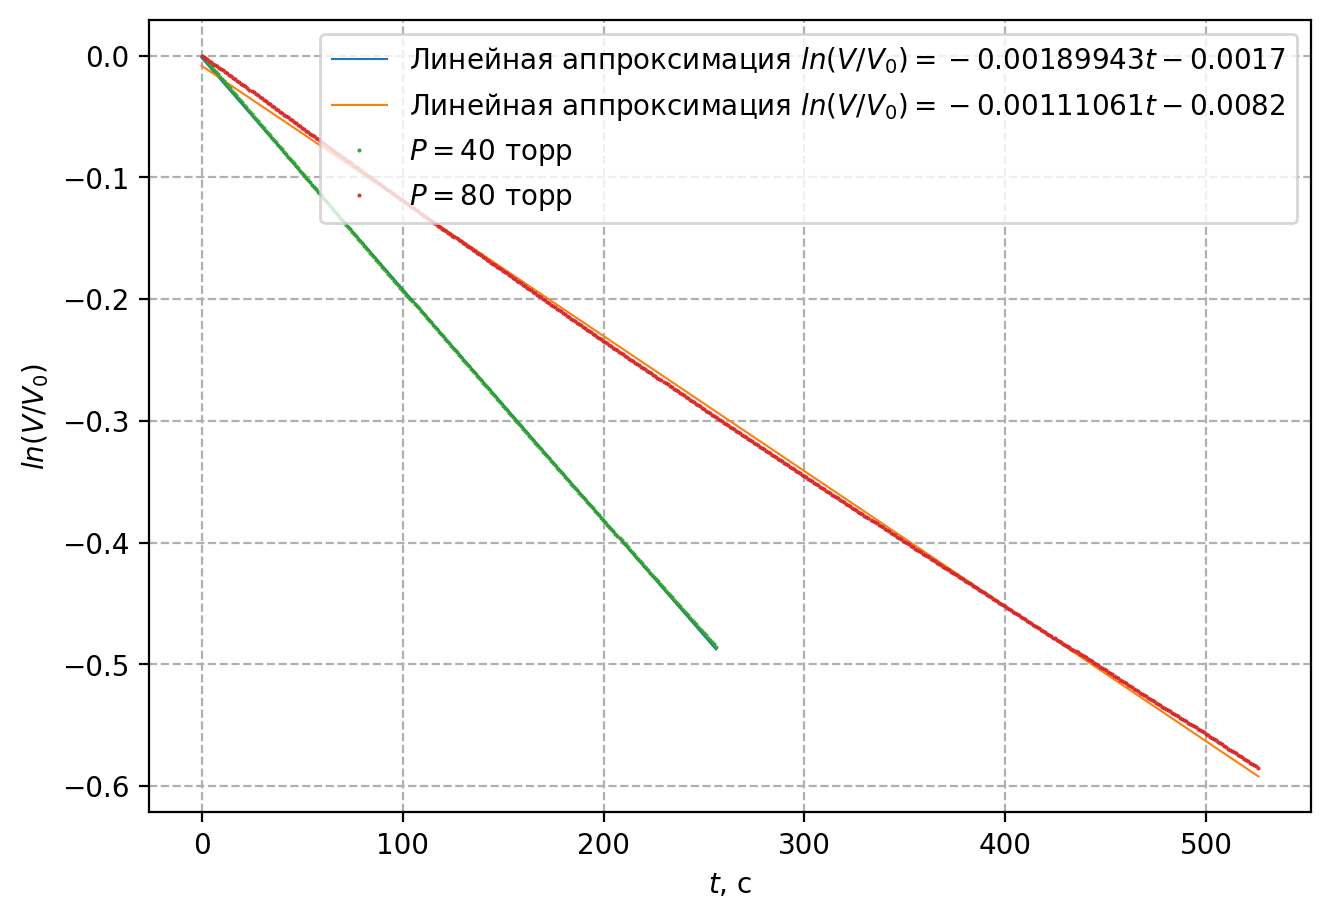

In [129]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$ln(V/V_0)$") # подписи к осям
plt.xlabel("$t$, с")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
plt.plot(data40["t (s)"], k40 * data40["t (s)"] + a40,linewidth=1.5/2, label="Линейная аппроксимация $ln(V/V_0) = %.8f t %.4f$" % (k40, a40)) # аппроксимация
plt.plot(data80["t (s)"], k80 * data80["t (s)"] + a80,linewidth=1.5/2, label="Линейная аппроксимация $ln(V/V_0) = %.8f t %.4f$" % (k80, a80)) # аппроксимация
plt.errorbar(data40["t (s)"], data40["ln(V/V0)"],  fmt="o", label="$P=40$ торр", ms=0.9/2) # точки с погрешностями
plt.errorbar(data80["t (s)"], data80["ln(V/V0)"],  fmt="o", label="$P=80$ торр", ms=0.9/2)
plt.legend() # легенда

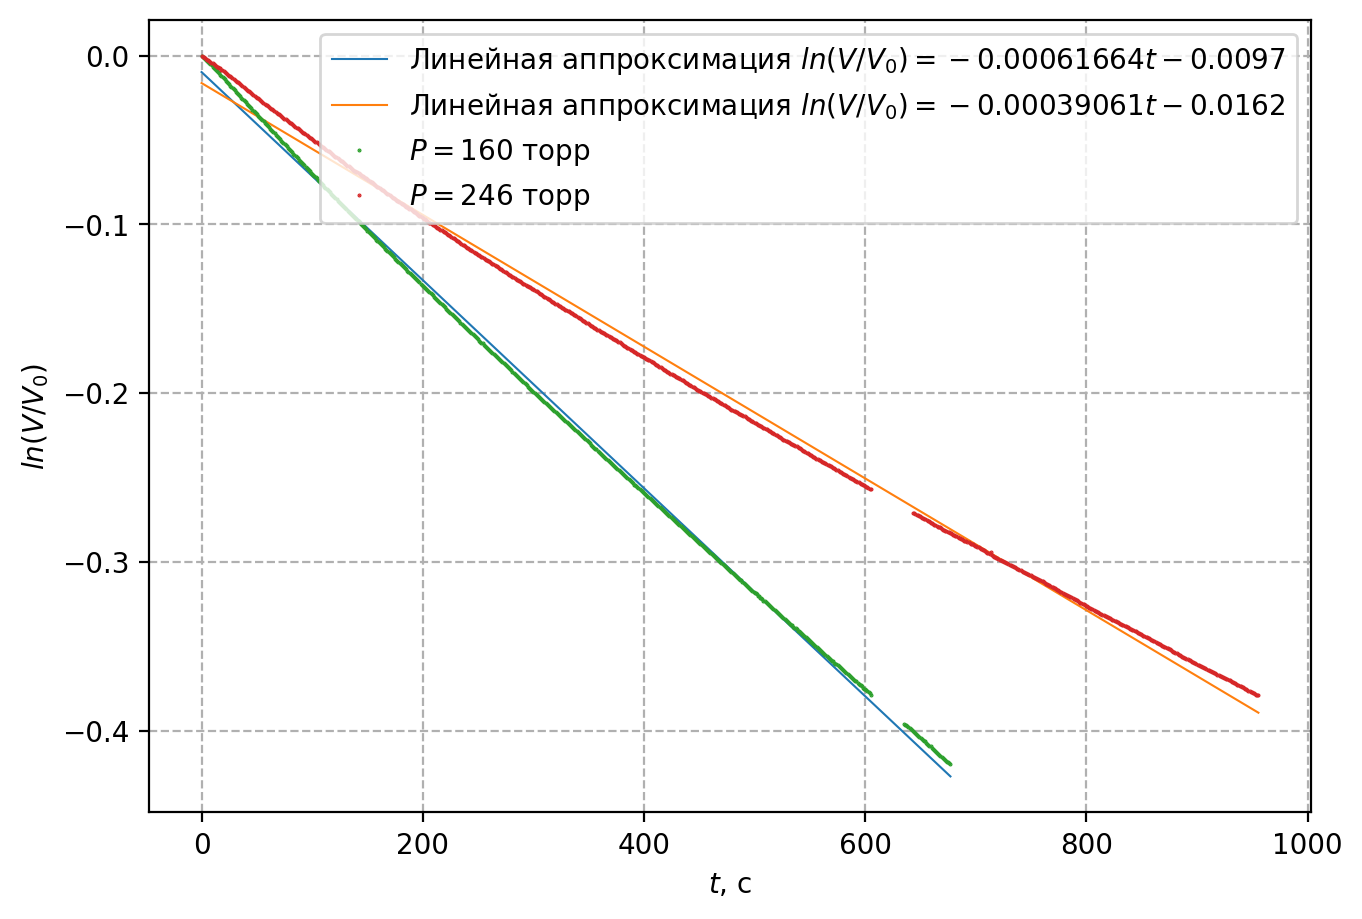

In [130]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$ln(V/V_0)$") # подписи к осям
plt.xlabel("$t$, с")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
plt.plot(data160["t (s)"], k160 * data160["t (s)"] + a160,linewidth=1.5/2, label="Линейная аппроксимация $ln(V/V_0) = %.8f t %.4f$" % (k160, a160)) # аппроксимация
plt.plot(data246["t (s)"], k246 * data246["t (s)"] + a246,linewidth=1.5/2, label="Линейная аппроксимация $ln(V/V_0) = %.8f t %.4f$" % (k246, a246)) # аппроксимация
plt.errorbar(data160["t (s)"], data160["ln(V/V0)"],  fmt="o", label="$P=160$ торр", ms=0.9/2) # точки с погрешностями
plt.errorbar(data246["t (s)"], data246["ln(V/V0)"],  fmt="o", label="$P=246$ торр", ms=0.9/2)
plt.legend() # легенда

In [ ]:
data40.loc[range(1,data40.shape[0],25)]

,t (s),V (mV),ln(V/V0)
1,0.974,12.3074,-0.002045
26,25.952,11.7316,-0.049960
51,50.952,11.1785,-0.098254
76,75.952,10.6527,-0.146433
101,100.951,10.1546,-0.194319
126,125.952,9.6824,-0.241936
151,150.952,9.2344,-0.289311
176,175.952,8.8079,-0.336597
201,200.952,8.4048,-0.383443
226,225.952,8.0208,-0.430208


In [ ]:
print(data246.loc[np.linspace(0,data246.shape[0]-1,25).astype(int)].style.to_latex(clines="all;index"))

\begin{tabular}{lrrr}
 & t (s) & V (mV) & ln(V/V0) \\
0 & 0.000000 & 13.660900 & 0.000000 \\
\cline{1-1}
38 & 37.910000 & 13.411400 & -0.018433 \\
\cline{1-1}
76 & 75.910000 & 13.155900 & -0.037667 \\
\cline{1-1}
114 & 113.910000 & 12.913000 & -0.056303 \\
\cline{1-1}
153 & 152.910000 & 12.679200 & -0.074575 \\
\cline{1-1}
191 & 190.910000 & 12.461300 & -0.091910 \\
\cline{1-1}
229 & 228.910000 & 12.252300 & -0.108824 \\
\cline{1-1}
267 & 266.910000 & 12.057700 & -0.124834 \\
\cline{1-1}
306 & 305.910000 & 11.863700 & -0.141054 \\
\cline{1-1}
344 & 343.910000 & 11.681400 & -0.156540 \\
\cline{1-1}
382 & 381.910000 & 11.504900 & -0.171765 \\
\cline{1-1}
420 & 419.910000 & 11.332100 & -0.186898 \\
\cline{1-1}
459 & 458.909000 & 11.164100 & -0.201834 \\
\cline{1-1}
497 & 496.910000 & 11.000500 & -0.216597 \\
\cline{1-1}
535 & 534.910000 & 10.847600 & -0.230594 \\
\cline{1-1}
573 & 572.910000 & 10.694400 & -0.244817 \\
\cline{1-1}
612 & 649.409000 & 10.396900 & -0.273030 \\
\cline{1-1}
650

In [ ]:
k246*1e3

-0.39061048217868205

In [ ]:
8.0469204109495e-07*1e3

0.00080469204109495

In [ ]:
data=pd.read_excel('data.xlsx', sheet_name="Лист1")
data

,p,k,sigmak
0,40,-1.8994,0.0008
1,80,-1.1107,0.0011
2,160,-0.6166,0.0008
3,246,-0.3906,0.0007


In [ ]:
data["D"]=-data["k"]/2*800*15*1e-3
data["sigmaD"]=data.D*np.sqrt((data.sigmak/data.k)**2+(5/800)**2+(0.1/15)**2)
data

,p,k,sigmak,D,sigmaD
0,40,-1.8994,0.0008,11.3964,0.104253
1,80,-1.1107,0.0011,6.6642,0.061255
2,160,-0.6166,0.0008,3.6996,0.034147
3,246,-0.3906,0.0007,2.3436,0.021824


In [ ]:
data["1/p"]=1/data.p*1e3
data["sigma1/p"]=3.7/data.p**2*1e3
data

,p,k,sigmak,D,sigmaD,1/p,sigma1/p
0,40,-1.8994,0.0008,11.3964,0.104253,25.000000,2.312500
1,80,-1.1107,0.0011,6.6642,0.061255,12.500000,0.578125
2,160,-0.6166,0.0008,3.6996,0.034147,6.250000,0.144531
3,246,-0.3906,0.0007,2.3436,0.021824,4.065041,0.061141


In [ ]:
kd,ad=mnk(data["1/p"] ,data.D)

Погрешность углового коэфицента
0.02430799055147549
Погрешность свободного коэфицента
0.19795255327318576


In [ ]:
kd

0.42497016566777385

In [ ]:
ad

0.9459585633463523

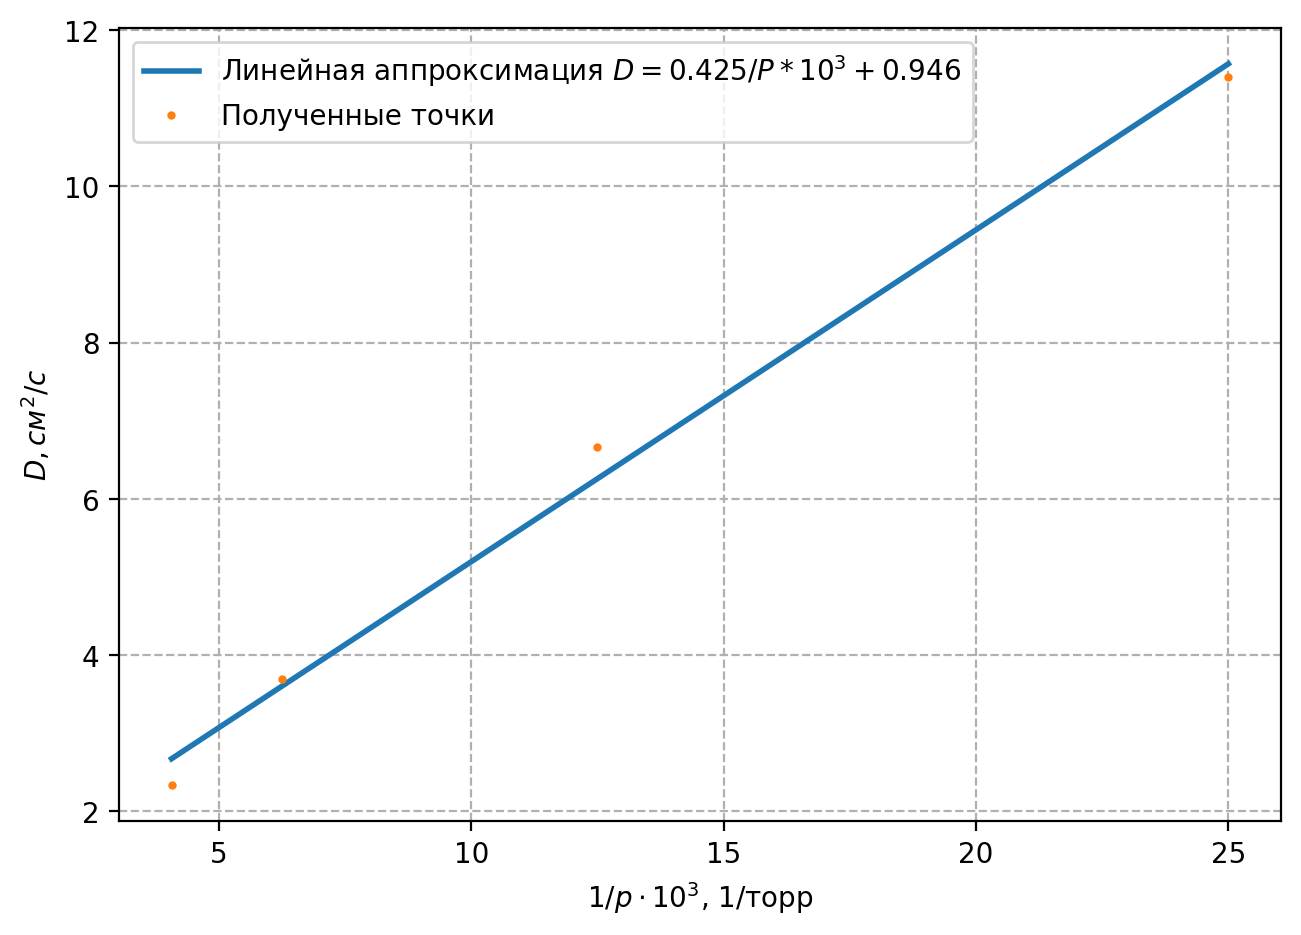

In [ ]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$D, {cм}^2/c$") # подписи к осям
plt.xlabel("$1/p \cdot 10^3$, 1/торр")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
plt.plot(data["1/p"], kd * data["1/p"] + ad,linewidth=2, label="Линейная аппроксимация $D = %.3f/P*10^3 + %.3f$" % (kd, ad)) # аппроксимация

plt.errorbar(data["1/p"] ,data.D,  fmt="o", label="Полученные точки", ms=2)
plt.legend() # легенда